In [56]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [57]:
from tensorflow.keras.preprocessing import sequence
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [58]:
len(x_train[0])

500

In [59]:
print(x_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [60]:
len(x_train[0])

500

In [61]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [63]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
# 영화 riview 각 단어 ->  128 차원의 vector로 변환
model.add(layers.Conv1D(32, 7, activation='relu')) # filter size => 7x128x1
model.add(layers.MaxPool1D(5)) # filter size => 5x1, stride = 5
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

/home/tommy/miniconda3/envs/py311/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [65]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - acc: 0.4949 - loss: 0.6941 - val_acc: 0.5790 - val_loss: 0.6842
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - acc: 0.6528 - loss: 0.6168 - val_acc: 0.8194 - val_loss: 0.4059
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.8378 - loss: 0.3692 - val_acc: 0.8392 - val_loss: 0.3628
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8844 - loss: 0.2772 - val_acc: 0.8722 - val_loss: 0.3088
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.9118 - loss: 0.2212 - val_acc: 0.8538 - val_loss: 0.3553
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9284 - loss: 0.1809 - val_acc: 0.8722 - val_loss: 0.3227
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.9496 - loss: 0.1382 - val_acc: 0.8906 - val_loss: 0.3014
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9728 - loss: 0.0864 - val_acc: 0.8710 - val_loss: 0.3779
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

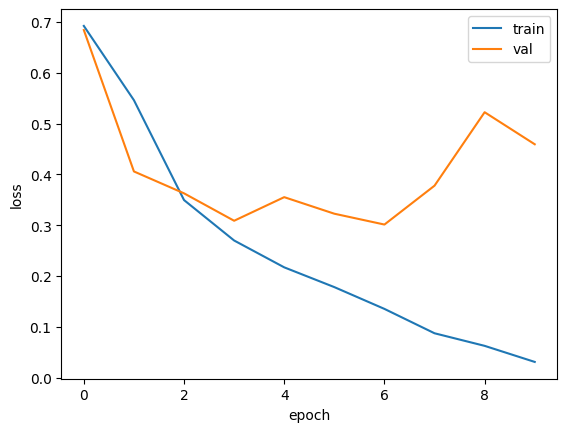

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [67]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8763 - loss: 0.4665


In [68]:
test_acc

0.8761600255966187

## 또 다른 예

In [69]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
#영화 riview 각 단어 ->  128 차원의 vector로 변환
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

embedding_3 (Embedding)      (None, 500, 128) => 하나의 영화평이 500단어로 구성, 그리고 각 단어는 128 차원 벡터로 구성

In [70]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [71]:
model.fit(x_train, y_train, epochs=5, batch_size=400)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - acc: 0.6219 - loss: 0.6592
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - acc: 0.8153 - loss: 0.4311
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.8752 - loss: 0.3215
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9013 - loss: 0.2651
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9280 - loss: 0.2160


In [72]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8704 - loss: 0.4103
test_acc: 0.8712400197982788
